#Random Forest


In [0]:
#walkthrough

In [0]:
#solution
# if we dont normalise the data then the accuracy is .6 after normalisation its .86
def create_prediction_function(x, y):
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  x = sc.fit_transform(x)
  classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  classifier.fit(x,y)
  return classifier

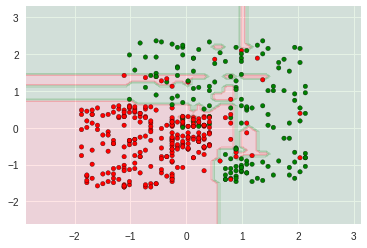

In [3]:
# Tests 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split


from sklearn import svm
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1C0h8c4TbHmbDvw6sscfZpG07AN-N92LALrjpkj3vPIs/gviz/tq?tqx=out:csv&sheet=personal_data')
x = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=5685)
model = create_prediction_function(x_train, y_train)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_test = sc.fit_transform(x_test)

prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)

#the plot begins 
x = sc.fit_transform(x)
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

color_list_light = ['red', 'green']
color_list_bold = ['red', 'green']
custom_cmap2 = ListedColormap(color_list_light)
custom_cmap1 = ListedColormap(color_list_bold)
plt.contourf(xx, yy, z, alpha=0.1,cmap=custom_cmap2)
plt.scatter(x[:, 0], x[:, 1], c=y,cmap=custom_cmap1,
                              s=20, edgecolor='black')
plt.show()

In [0]:
assert accuracy >.8, 'Failed'